In [1]:
import torch
import os,sys; sys.path.insert(0, os.path.abspath('.'))

sys.path.append('../../')
from hex.pytorch.board_graph import Board, PositionalEncoder
from hex.pytorch.graph_net import GraphNet
from utils import dotdict

In [2]:
b = Board(torch.zeros(4,4).long())
b.np_pieces[1,0] = -1
b.np_pieces[1,1] = -1
b.np_pieces[2,1] = -1
b.np_pieces[2,2] = -1
b.np_pieces[0,2] = 1
b.np_pieces[0,3] = 1
b.np_pieces[3,2] = 1
b.np_pieces[2,0] = 1
print(b.display_string, "\n\n", b.np_pieces)

`  0   1   2   3   
  ----------------
0 `   .   .   V   V `
  1 `   H   H   .   . `
    2 `   V   H   H   . `
      3 `   .   .   V   . `
          ---------------- 

 tensor([[ 0,  0,  1,  1],
        [-1, -1,  0,  0],
        [ 1, -1, -1,  0],
        [ 0,  0,  1,  0]])


In [3]:
args = dotdict({
    'lr': 0.001,
    'dropout': 0.3,
    'epochs': 10,
    'batch_size': 64,
    'cuda': torch.cuda.is_available(),
    'num_channels': 32,
    'res_blocks' : 5,
    'board_size' : 7,
    #'in_channels' : 3,                   # 0/1/2 - black/white/empty
    'expand_base' : 2,
    'attn_heads' : 1,
    'pos_encoding_sz' : 28,
    'readout_attn_heads' : 4
})

model = GraphNet(args)

In [4]:
p, v = model(b.np_pieces.unsqueeze(dim=0))

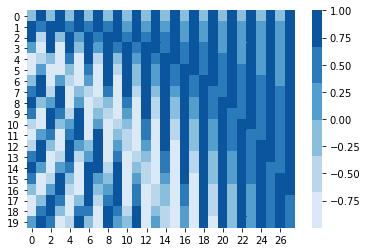

In [5]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

penc = PositionalEncoder(d_model=28, max_seq_len=500, base_wave_length=5)
#x = torch.randperm(20)
x = torch.arange(500)
x = penc(x)

ax = sns.heatmap(x[:20].numpy(), cmap=sns.color_palette("Blues"))

In [8]:
torch.rand(4, 4).softmax(dim=1)

tensor([[0.2206, 0.1805, 0.3694, 0.2295],
        [0.1867, 0.3516, 0.1567, 0.3051],
        [0.2796, 0.2838, 0.2152, 0.2214],
        [0.1994, 0.1881, 0.3167, 0.2958]])